In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os
import matplotlib.pyplot as plt
import numpy as np


Simple kinematic computation for muon, neutrino lateral separation from Meson (pion) decay

# Decay Kinematic

In [4]:
def energy_cm(m_p, m_mu):
    r = m_mu* m_mu / (m_p* m_p)
    E_mu = m_p/2.*(1 + r)
    E_nu = m_p/2.*(1 - r)
    return E_mu, E_nu

def four_momenta_lab_frame(m_p, m_mu, E_p, theta_nu_cm):
    # Lorentz factor:
    gamma = E_p/m_p
    beta = np.sqrt(1-1/(gamma* gamma))
    # beta = 1

    r = m_mu* m_mu / (m_p* m_p)

    # energies in lab frame
    Emu_cm, Enu_cm = energy_cm(m_p, m_mu)
    Enu_lab = gamma* Enu_cm* (1+beta*np.cos(theta_nu_cm))
    Emu_lab = gamma* Enu_cm* ((1+r)/(1-r)-beta*np.cos(theta_nu_cm))

    # momenta in lab frame:
    py_nu_lab = Enu_cm *np.sin(theta_nu_cm)
    py_mu_lab = - Enu_cm *np.sin(theta_nu_cm)

    px_nu_cm = Enu_cm* np.cos(theta_nu_cm)
    px_mu_cm = -Enu_cm* np.cos(theta_nu_cm)
    px_nu_lab = gamma* (px_nu_cm + Enu_cm*beta)
    px_mu_lab = gamma* (px_mu_cm + Emu_cm*beta)

    return (Emu_lab, px_mu_lab, py_mu_lab), (Enu_lab, px_nu_lab, py_nu_lab)

def angle(P1, P2):
    prod = P1[0]* P2[0] + P1[1]* P2[1]
    amp_P1 = np.sqrt(P1[0]* P1[0] + P1[1]* P1[1])
    amp_P2 = np.sqrt(P2[0]* P2[0] + P2[1]* P2[1])
    a = np.arccos( prod/(amp_P1* amp_P2) )
    return a

# Kinematic in lab frame

In [5]:
def decay_kinematic_lab(Ep, theta_nu, m_p=0.135, m_mu=0.103):
    Pxnu = []
    Pynu = []
    Enu = []
    Pxmu = []
    Pymu = []
    Emu = []
    alpha = []
    for theta in theta_nu:
        Pmu, Pnu = four_momenta_lab_frame(m_p, m_mu, Ep, theta)
        Emu.append(Pmu[0])
        Pxmu.append(Pmu[1])
        Pymu.append(Pmu[2])

        Enu.append(Pnu[0])
        Pxnu.append(Pnu[1])
        Pynu.append(Pnu[2])
        
        alpha.append(angle( (Pnu[1], Pnu[2]), (Pmu[1], Pmu[2]) ))
    return Emu, Pxmu, Pymu, Enu, Pxnu, Pynu, alpha

In [6]:
Ep=100
Ep2 = 500
Ep3 = 1000
Ep4 = 10000
theta_nu = np.linspace(0, np.pi, 100)

Emu, Pxmu, Pymu, Enu, Pxnu, Pynu, alpha = decay_kinematic_lab(Ep, theta_nu)
Emu2, Pxmu2, Pymu2, Enu2, Pxnu2, Pynu2, alpha2 = decay_kinematic_lab(Ep2, theta_nu)
Emu3, Pxmu3, Pymu3, Enu3, Pxnu3, Pynu3, alpha3 = decay_kinematic_lab(Ep3, theta_nu)
Emu4, Pxmu4, Pymu4, Enu4, Pxnu4, Pynu4, alpha4 = decay_kinematic_lab(Ep4, theta_nu)

Text(0, 0.5, '$p_{x}$')

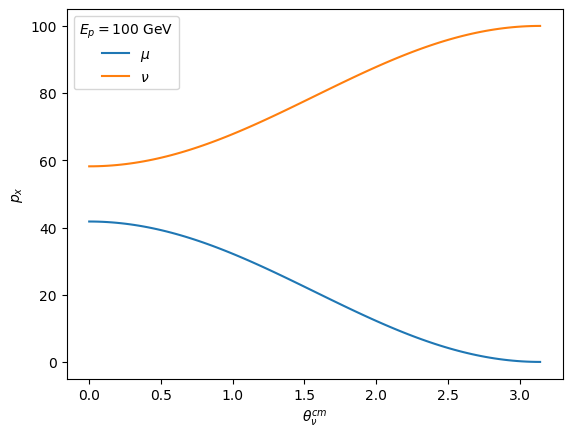

In [7]:
plt.plot(theta_nu, Pxnu, label=r'$\mu$')
plt.plot(theta_nu, Pxmu, label=r'$\nu$')
plt.legend(title = r'$E_{p} = $'+ f'{Ep} GeV')
plt.xlabel(r'$\theta_{\nu}^{cm}$')
plt.ylabel(r'$p_{x}$')

Text(0, 0.5, 'lab energy')

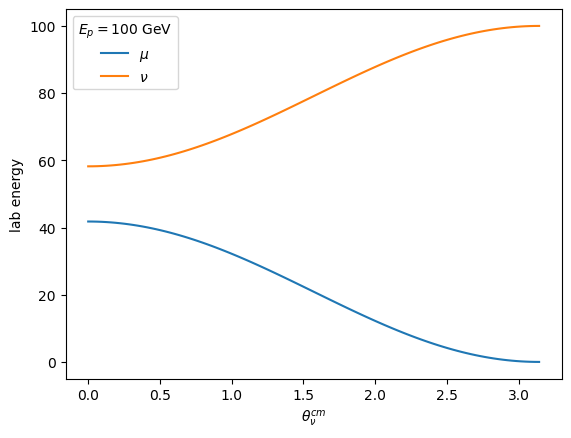

In [8]:
plt.plot(theta_nu, Enu, label=r'$\mu$')
plt.plot(theta_nu, Emu, label=r'$\nu$')
plt.legend(title = r'$E_{p} = $'+ f'{Ep} GeV')
plt.xlabel(r'$\theta_{\nu}^{cm}$')
plt.ylabel(r'lab energy')

[]

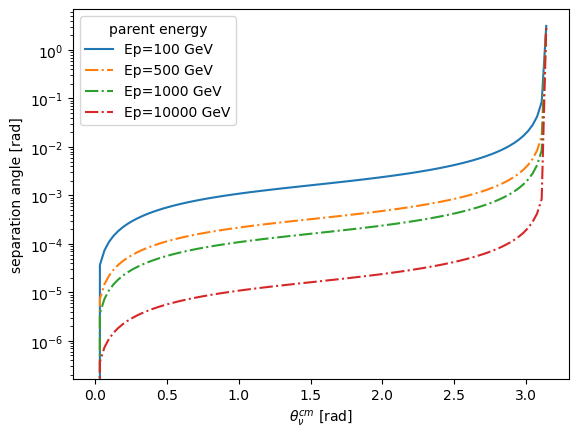

In [9]:
plt.plot(theta_nu, alpha, label = f'Ep={Ep} GeV')
plt.plot(theta_nu, alpha2, ls='-.', label = f'Ep={Ep2} GeV')
plt.plot(theta_nu, alpha3, ls='-.', label = f'Ep={Ep3} GeV')
plt.plot(theta_nu, alpha4, ls='-.', label = f'Ep={Ep4} GeV')

plt.legend(title='parent energy')
plt.xlabel(r'$\theta_{\nu}^{cm}$ [rad]')
plt.ylabel(r'separation angle [rad]')
plt.semilogy()

(1, 1000)

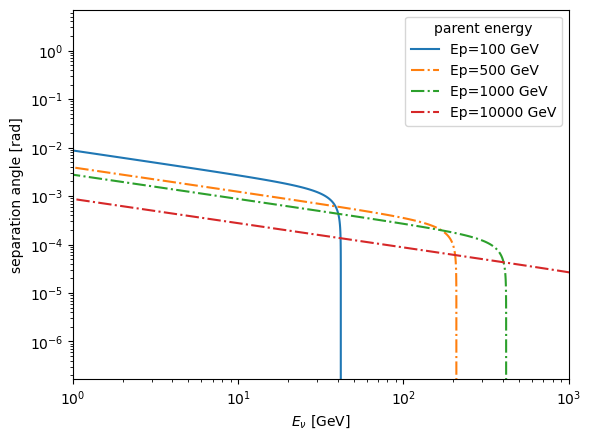

In [10]:
plt.plot(Enu, alpha, label = f'Ep={Ep} GeV')
plt.plot(Enu2, alpha2, ls='-.', label = f'Ep={Ep2} GeV')
plt.plot(Enu3, alpha3, ls='-.', label = f'Ep={Ep3} GeV')
plt.plot(Enu4, alpha4, ls='-.', label = f'Ep={Ep4} GeV')

# plt.plot(Enu, np.rad2deg(alpha), label = f'Ep={Ep} GeV')
# plt.plot(Enu2, np.rad2deg(alpha2), ls='-.', label = f'Ep={Ep2} GeV')
# plt.plot(Enu3, np.rad2deg(alpha3), ls='-.', label = f'Ep={Ep3} GeV')

plt.legend(title='parent energy')
plt.xlabel(r'$E_{\nu}$ [GeV]')
plt.ylabel(r'separation angle [rad]')
plt.semilogy()
plt.semilogx()
plt.xlim(1, 1000)


(0.1, 300.0)

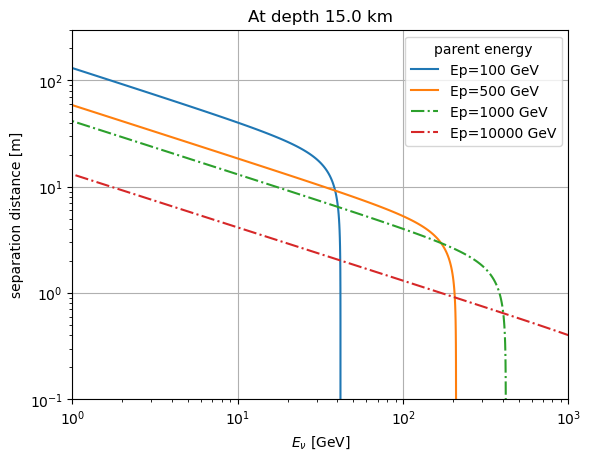

In [13]:
depth = 15000
plt.plot(Enu, np.array(alpha)* depth, label = f'Ep={Ep} GeV')
plt.plot(Enu2, np.array(alpha2)* depth, label = f'Ep={Ep2} GeV')
plt.plot(Enu3, np.array(alpha3)* depth, label = f'Ep={Ep3} GeV', ls='-.')
plt.plot(Enu4, np.array(alpha4)* depth, label = f'Ep={Ep4} GeV', ls='-.')


plt.legend(title='parent energy')
plt.xlabel(r'$E_{\nu}$ [GeV]')
plt.ylabel(r'separation distance [m]')
plt.title(f'At depth {depth* 1e-3} km')
plt.semilogy()
plt.semilogx()
plt.grid()
plt.xlim(1, 1e3)
plt.ylim(1e-1, 3e2)